In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
clean_loans = loans.copy()

In [5]:
clean_loans.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [6]:
clean_loans= clean_loans[['LoanStatus','LoanOriginalAmount', 'Term','BorrowerAPR',
             'CreditScoreRangeLower','IncomeRange',]]

In [7]:
clean_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 6 columns):
LoanStatus               113937 non-null object
LoanOriginalAmount       113937 non-null int64
Term                     113937 non-null int64
BorrowerAPR              113912 non-null float64
CreditScoreRangeLower    113346 non-null float64
IncomeRange              113937 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 5.2+ MB


In [8]:
clean_loans = clean_loans.dropna()
clean_loans.head()

,LoanStatus,LoanOriginalAmount,Term,BorrowerAPR,CreditScoreRangeLower,IncomeRange
0,Completed,9425,36,0.16516,640.0,"$25,000-49,999"
1,Current,10000,36,0.12016,680.0,"$50,000-74,999"
2,Completed,3001,36,0.28269,480.0,Not displayed
3,Current,10000,36,0.12528,800.0,"$25,000-49,999"
4,Current,15000,36,0.24614,680.0,"$100,000+"


In [9]:
clean_loans.LoanStatus.value_counts()

Current                   56576
Completed                 37658
Chargedoff                11944
Defaulted                  4892
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     4
Name: LoanStatus, dtype: int64

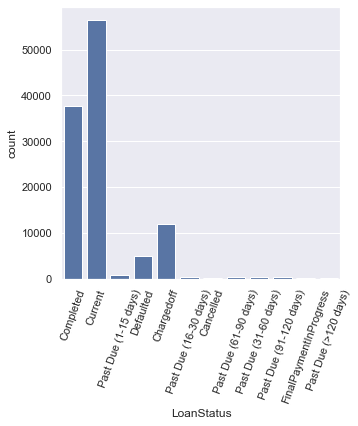

In [10]:
plt.figure(figsize=[5, 5]);
sns.countplot(x ='LoanStatus', data=clean_loans, color = sns.color_palette()[0]);
plt.xticks(rotation=70);


In [11]:
defaults = clean_loans.query("LoanStatus == 'Defaulted' ")
defaults= defaults.drop(columns={'LoanStatus'})
defaults

,LoanOriginalAmount,Term,BorrowerAPR,CreditScoreRangeLower,IncomeRange
15,4000,36,0.35797,700.0,"$50,000-74,999"
23,2000,36,0.28032,680.0,"$25,000-49,999"
107,4000,36,0.35797,720.0,"$25,000-49,999"
128,1000,36,0.18824,500.0,Not displayed
138,3000,36,0.33973,620.0,"$25,000-49,999"
...,...,...,...,...,...
113840,1400,36,0.22674,660.0,"$1-24,999"
113847,8000,36,0.20735,740.0,"$100,000+"
113914,3000,36,0.25757,520.0,Not displayed
113918,7000,36,0.12201,740.0,"$50,000-74,999"


In [12]:
defaults.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4892 entries, 15 to 113926
Data columns (total 5 columns):
LoanOriginalAmount       4892 non-null int64
Term                     4892 non-null int64
BorrowerAPR              4892 non-null float64
CreditScoreRangeLower    4892 non-null float64
IncomeRange              4892 non-null object
dtypes: float64(2), int64(2), object(1)
memory usage: 229.3+ KB


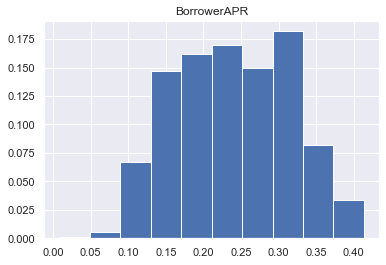

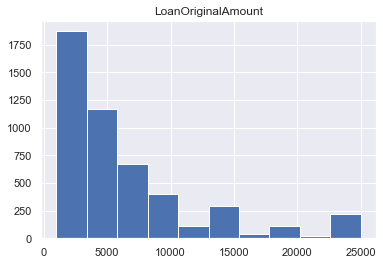

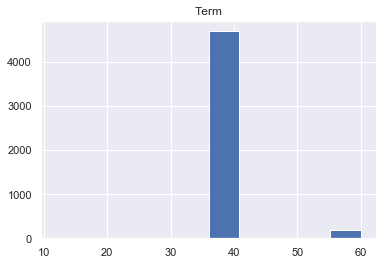

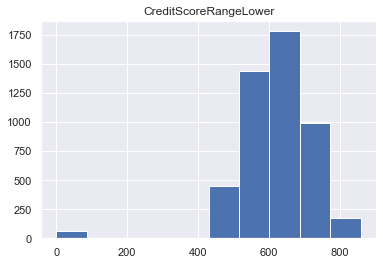

In [13]:
weights_df=np.ones(len(defaults)) / len(defaults)


defaults.hist('BorrowerAPR', weights=weights_df,density=False)
defaults.hist('LoanOriginalAmount');
defaults.hist('Term');
defaults.hist('CreditScoreRangeLower');

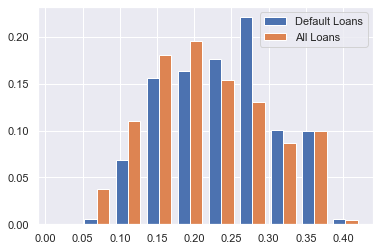

In [14]:
weights_df=np.ones(len(defaults)) / len(defaults)
weights_cl=np.ones(len(clean_loans)) / len(clean_loans)


x = defaults['BorrowerAPR']
y = clean_loans['BorrowerAPR']
plt.hist([x, y], label=['Default Loans', 'All Loans'], bins=10 ,weights=[weights_df,weights_cl])
plt.legend(loc='upper right');

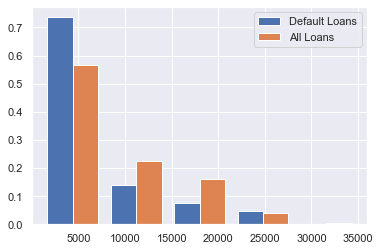

In [15]:
weights_df=np.ones(len(defaults)) / len(defaults)
weights_cl=np.ones(len(clean_loans)) / len(clean_loans)

x = defaults['LoanOriginalAmount']
y = clean_loans['LoanOriginalAmount']
plt.hist([x, y], label=['Default Loans', 'All Loans'], bins=5, weights=[weights_df,weights_cl])
plt.legend(loc='upper right');

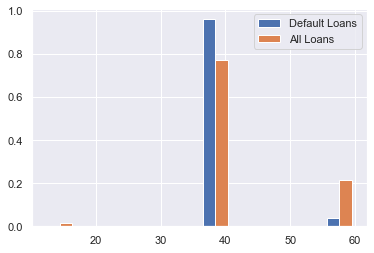

In [16]:
x = defaults['Term']
y = clean_loans['Term']
plt.hist([x, y], label=['Default Loans', 'All Loans'],  bins=10, weights=[weights_df,weights_cl])
plt.legend(loc='upper right');

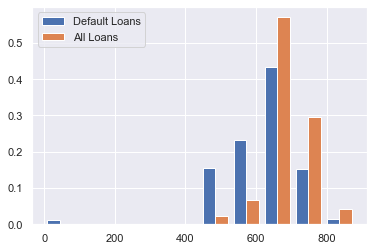

In [17]:
x = defaults['CreditScoreRangeLower']
y = clean_loans['CreditScoreRangeLower']
plt.hist([x, y], label=['Default Loans', 'All Loans'], bins=10, weights=[weights_df,weights_cl])
plt.legend(loc='upper left');

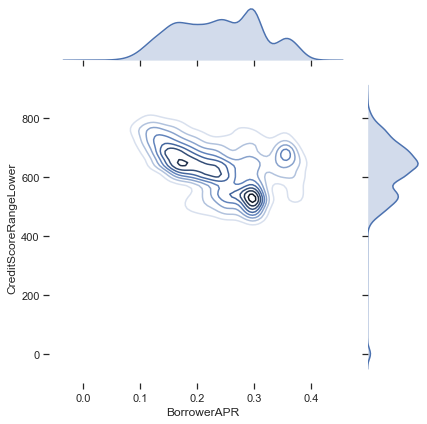

In [18]:
#Create a joint plot for BorrowerAPR and CreditScore
sns.set_style('ticks')
sns.jointplot(x='BorrowerAPR',y='CreditScoreRangeLower',data=defaults,
              kind='kde', shade=False)
sns.despine(left=True, bottom=True);

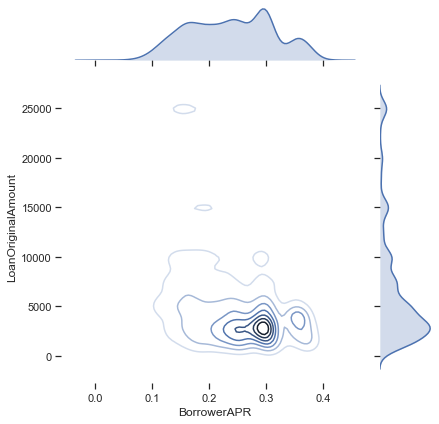

In [19]:
sns.set_style('ticks')
sns.jointplot(x='BorrowerAPR',y='LoanOriginalAmount',data=defaults,
              kind='kde', shade=False)
sns.despine(left=True, bottom=True);

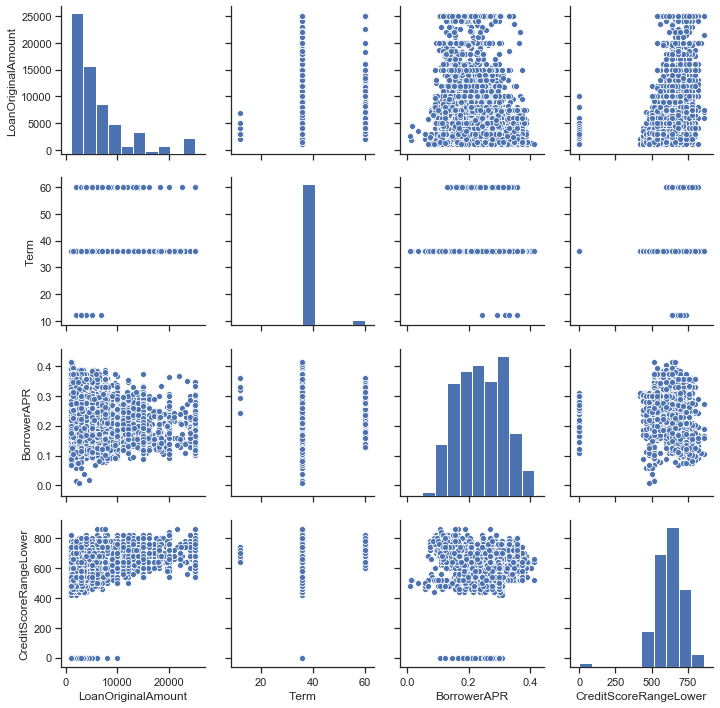

In [20]:
sns.pairplot(defaults)

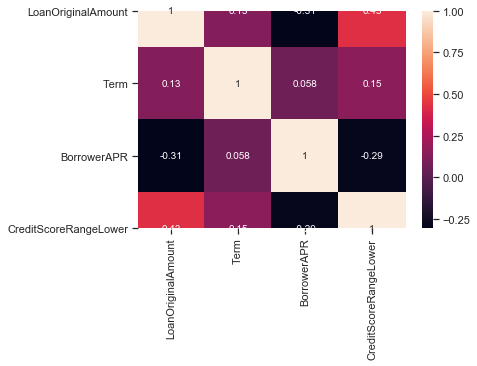

In [21]:
sns.heatmap(defaults.corr(),annot=True);